In [178]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import seaborn as sns
import censusdata

%matplotlib inline

### Loading Predicted Vacant Lot files

In [182]:
philly_points = pd.read_csv('data/city/Vacant_Indicators_Points.csv')
philly_points.head()
#https://metadata.phila.gov/#home/datasetdetails/58078697d414285d25b14e3c/representationdetails/59c154f1c8357d22ed035e66/

,X,Y,OBJECTID,ADDRESS,OWNER1,OWNER2,BLDG_DESC,OPA_ID,LNIADDRESSKEY,COUNCILDISTRICT,ZONINGBASEDISTRICT,ZIPCODE,LAND_RANK,BUILD_RANK,VACANT_FLAG,VACANT_RANK
0,-75.178904,39.934505,1,2041 REED ST,GREATER DELIVERANCE TEMPL,NaN,VAC LAND COMM. < ACRE,885396760.0,498086,2,CMX-2,19146.0,0.67,0.0,Land,0.67
1,-75.164548,39.988160,2,2233 N UBER ST,CITY OF PHILA,NaN,VAC LAND RES < ACRE,162113701.0,581713,5,RSA-5,19132.0,0.50,0.0,Land,0.50
2,-75.180480,39.978561,3,1460 N MARSTON ST,PHILADELPHIA HOUSING AUTH,NaN,VAC LAND RES < ACRE,292083110.0,415511,5,RSA-5,19121.0,0.50,0.0,Land,0.50
3,-75.186579,40.006852,4,3241 SUGDENS ROW,JORDAN MARIA,NaN,VAC LAND RES < ACRE,382209500.0,557317,4,RSA-5,19129.0,1.00,0.0,Land,1.00
4,-75.238794,39.954902,5,5816 PINE ST,WALSH JAMES,LUBLIN WILLIAM H,ROW 2 STY MASONRY,604178400.0,485528,3,RM-1,19143.0,0.00,1.0,Building,1.00


In [183]:
philly_points.dtypes

X                     float64
Y                     float64
OBJECTID                int64
ADDRESS                object
OWNER1                 object
OWNER2                 object
BLDG_DESC              object
OPA_ID                float64
LNIADDRESSKEY          object
COUNCILDISTRICT         int64
ZONINGBASEDISTRICT     object
ZIPCODE               float64
LAND_RANK             float64
BUILD_RANK            float64
VACANT_FLAG            object
VACANT_RANK           float64
dtype: object

In [185]:
philly_points.isna().sum()

X                         0
Y                         0
OBJECTID                  0
ADDRESS                   1
OWNER1                    1
OWNER2                28556
BLDG_DESC                70
OPA_ID                   21
LNIADDRESSKEY           336
COUNCILDISTRICT           0
ZONINGBASEDISTRICT       40
ZIPCODE                 322
LAND_RANK                 2
BUILD_RANK                0
VACANT_FLAG               2
VACANT_RANK               2
dtype: int64

In [3]:
philly_points.describe()

,X,Y,OBJECTID,OPA_ID,COUNCILDISTRICT,ZIPCODE,LAND_RANK,BUILD_RANK,VACANT_RANK
count,36917.000000,36917.000000,36917.00000,3.689600e+04,36917.000000,36595.000000,36915.000000,36917.000000,36915.000000
mean,-75.167337,39.985244,18459.00000,3.431197e+08,4.913211,19131.573330,0.525169,0.150244,0.665391
std,0.041322,0.031944,10657.16428,2.276140e+08,2.175462,11.154188,0.343984,0.252557,0.184587
min,-75.269183,39.883301,1.00000,1.100490e+07,1.000000,19102.000000,0.000000,0.000000,0.500000
25%,-75.189216,39.968623,9230.00000,1.831285e+08,3.000000,19122.000000,0.415000,0.000000,0.500000
50%,-75.165435,39.986638,18459.00000,3.110167e+08,5.000000,19133.000000,0.500000,0.000000,0.670000
75%,-75.144508,39.999227,27688.00000,4.320889e+08,7.000000,19140.000000,0.670000,0.500000,0.670000
max,-74.964149,40.135042,36917.00000,8.886000e+08,10.000000,19154.000000,1.000000,1.000000,1.000000


In [4]:
philly_points.dtypes

X                     float64
Y                     float64
OBJECTID                int64
ADDRESS                object
OWNER1                 object
OWNER2                 object
BLDG_DESC              object
OPA_ID                float64
LNIADDRESSKEY          object
COUNCILDISTRICT         int64
ZONINGBASEDISTRICT     object
ZIPCODE               float64
LAND_RANK             float64
BUILD_RANK            float64
VACANT_FLAG            object
VACANT_RANK           float64
dtype: object

In [5]:
philly_land = pd.read_csv('data/city/Vacant_Indicators_land.csv')
philly_land.head()
#https://metadata.phila.gov/#home/datasetdetails/58078697d414285d25b14e3c/representationdetails/58078a80b9e3a26d110fa20e/

,OBJECTID,ADDRESS,OWNER1,OWNER2,BLDG_DESC,OPA_ID,LNIADDRESSKEY,COUNCILDISTRICT,ZONINGBASEDISTRICT,ZIPCODE,LAND_RANK,Shape__Area,Shape__Length
0,1,2508 CORAL ST,DUONG DEP THI,NaN,VAC LAND RES < ACRE,311103400.0,97735,1,RSA-5,19125.0,0.50,128.351562,58.941479
1,2,1441 S FALLON ST,PHILADELPHIA LAND BANK,NaN,VAC LAND RES < ACRE,273036610.0,284084,3,RSA-5,19143.0,0.67,116.269531,51.521343
2,3,604 E LIPPINCOTT ST,MCIVOR JAMISA,NaN,VAC LAND RES < ACRE,331017100.0,394632,7,RSA-5,19134.0,0.50,112.847656,51.232811
3,4,1629 S TANEY ST,BHATTI SARWAT A,NaN,VAC LAND RES < ACRE,364283000.0,564768,2,RSA-5,19145.0,1.00,103.789062,47.910284
4,5,2434 N BROAD ST,ELEBAH INC,NaN,VAC LAND COMM. < ACRE,885151680.0,50430,5,CMX-2.5,19132.0,0.50,299.125000,99.025594


### Loading Philadephia Shape file

<AxesSubplot:>

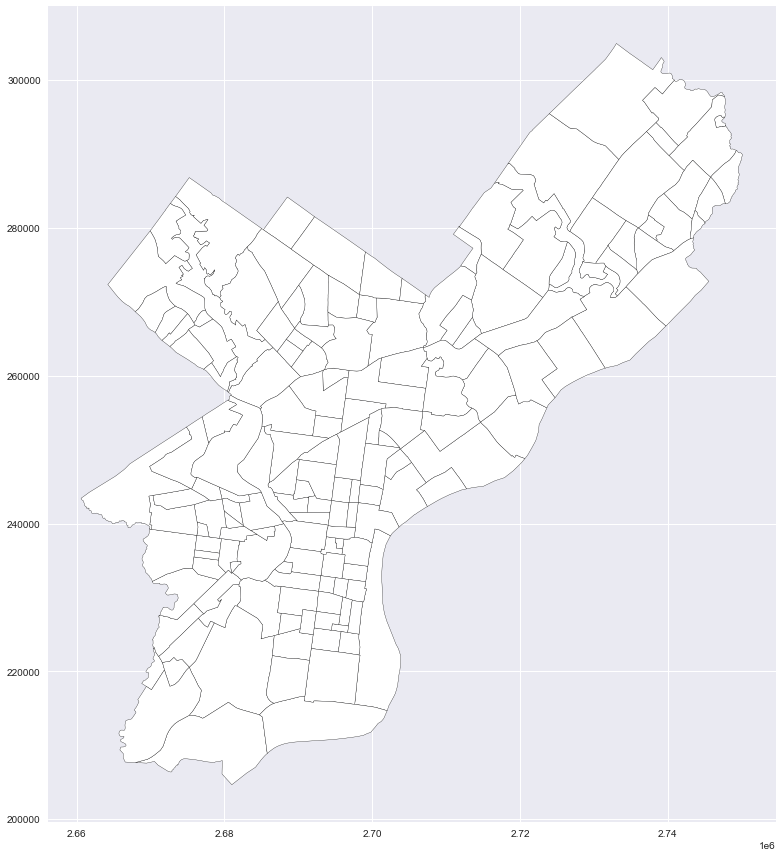

In [179]:
street_map = gpd.read_file("data/geo_shape/Neighborhoods_Philadelphia.shp")
#Download shape file from here. Download all files under folder "Neighborhoods_philadelphia" and keep in the same folder https://github.com/azavea/geo-data
fig,ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
street_map.plot(ax = ax,  color = "white", edgecolor='black')

In [8]:
street_map.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."


<AxesSubplot:>

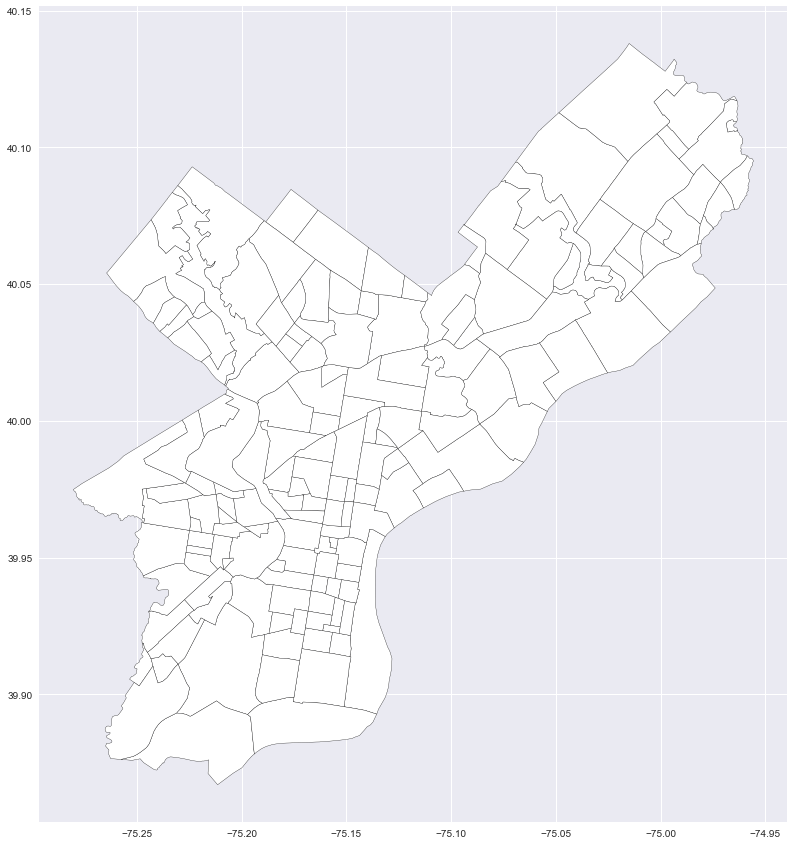

In [9]:
fig,ax = plt.subplots(figsize =(15,15))
street_map.to_crs(epsg = 4326).plot(ax = ax, color = "white", edgecolor='black')# converting axis to coordiate with longitude and latitude

<AxesSubplot:>

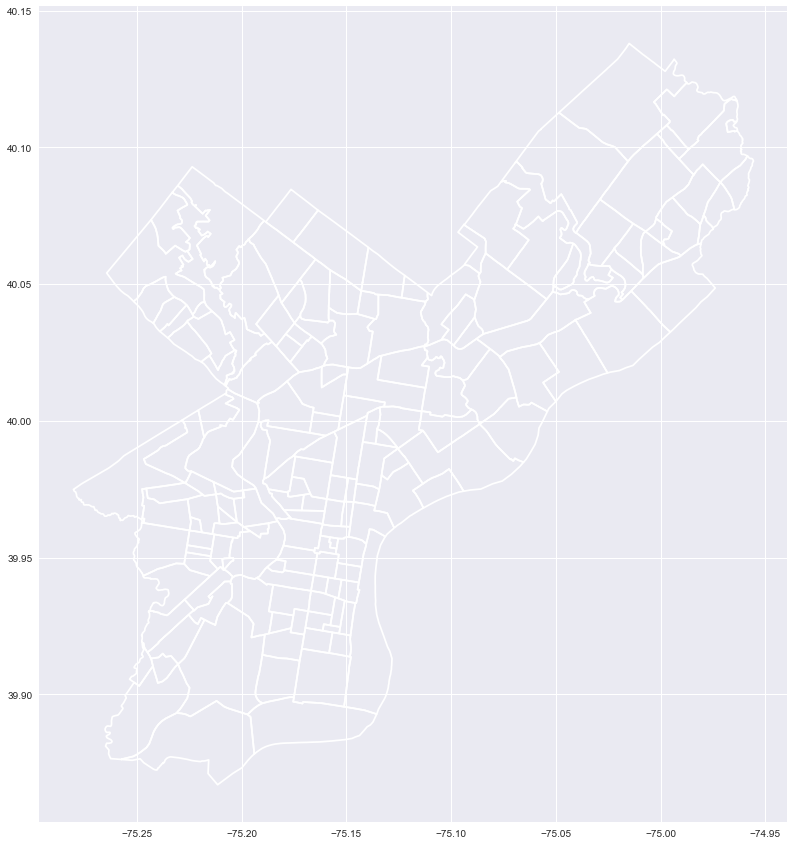

In [24]:
fig,ax = plt.subplots(figsize =(15,15))
street_map.to_crs(epsg = 4326).boundary.plot(ax = ax)# plotting only boundary

In [10]:
street_map.to_crs(epsg = 4326).head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((-75.06773 40.00540, -75.06765 40.005..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((-75.01560 40.09487, -75.01768 40.092..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((-75.18848 40.07273, -75.18846 40.072..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((-75.21221 40.08604, -75.21210 40.086..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((-75.18478 40.02837, -75.18426 40.027..."


In [11]:
street_map.total_bounds# exact city boundary

array([2660586.2010556 ,  204650.55486186, 2750109.00494927,
        304965.32339202])

In [12]:
street_map.centroid# center coordinate of the sape

0      POINT (2719422.233 253264.287)
1      POINT (2725947.795 288491.804)
2      POINT (2688745.576 280652.166)
3      POINT (2679098.697 279137.188)
4      POINT (2685458.776 259484.374)
                    ...              
153    POINT (2688489.596 218958.968)
154    POINT (2697705.388 227294.296)
155    POINT (2691305.087 226663.440)
156    POINT (2688805.843 226518.573)
157    POINT (2693761.573 226871.685)
Length: 158, dtype: geometry

### Philly shape file on philly vacant lot file combined

In [13]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(philly_points["X"], philly_points["Y"])]
geometry[:3]

In [14]:
geo_df = gpd.GeoDataFrame(philly_points,
                            crs = crs,
                            geometry = geometry)

geo_df.head()

,X,Y,OBJECTID,ADDRESS,OWNER1,OWNER2,BLDG_DESC,OPA_ID,LNIADDRESSKEY,COUNCILDISTRICT,ZONINGBASEDISTRICT,ZIPCODE,LAND_RANK,BUILD_RANK,VACANT_FLAG,VACANT_RANK,geometry
0,-75.178904,39.934505,1,2041 REED ST,GREATER DELIVERANCE TEMPL,NaN,VAC LAND COMM. < ACRE,885396760.0,498086,2,CMX-2,19146.0,0.67,0.0,Land,0.67,POINT (-75.17890 39.93451)
1,-75.164548,39.988160,2,2233 N UBER ST,CITY OF PHILA,NaN,VAC LAND RES < ACRE,162113701.0,581713,5,RSA-5,19132.0,0.50,0.0,Land,0.50,POINT (-75.16455 39.98816)
2,-75.180480,39.978561,3,1460 N MARSTON ST,PHILADELPHIA HOUSING AUTH,NaN,VAC LAND RES < ACRE,292083110.0,415511,5,RSA-5,19121.0,0.50,0.0,Land,0.50,POINT (-75.18048 39.97856)
3,-75.186579,40.006852,4,3241 SUGDENS ROW,JORDAN MARIA,NaN,VAC LAND RES < ACRE,382209500.0,557317,4,RSA-5,19129.0,1.00,0.0,Land,1.00,POINT (-75.18658 40.00685)
4,-75.238794,39.954902,5,5816 PINE ST,WALSH JAMES,LUBLIN WILLIAM H,ROW 2 STY MASONRY,604178400.0,485528,3,RM-1,19143.0,0.00,1.0,Building,1.00,POINT (-75.23879 39.95490)


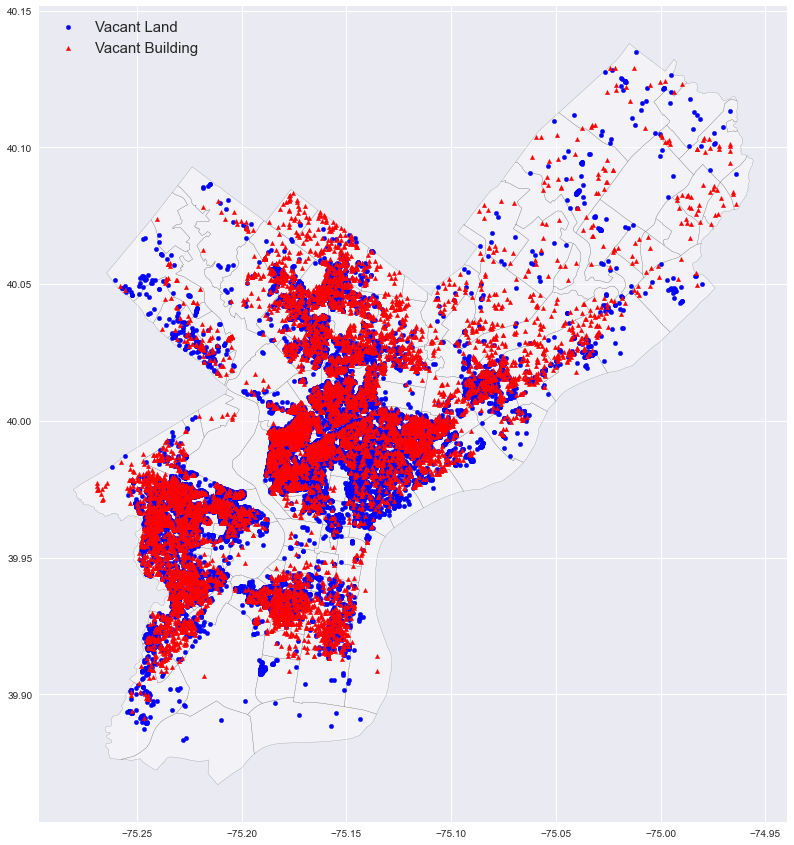

In [15]:
fig, ax = plt.subplots(figsize =(15,15))
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')
geo_df[geo_df['VACANT_FLAG'] == 'Land'].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Vacant Land")
geo_df[geo_df['VACANT_FLAG'] == 'Building'].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "Vacant Building")
#geo_df.plot(column = 'BUILD_RANK', ax = ax, alpha = 0.5, legend = True, markersize = 10)
plt.legend(prop = {'size' : 15})
#plt.show()

### Loading Open Street Map File of PA

In [16]:
#download pennsylvania open street map data
#https://download.geofabrik.de/north-america/us/pennsylvania.html
#details of dataset http://download.geofabrik.de/osm-data-in-gis-formats-free.pdf
roads_path = "data/osm/gis_osm_roads_free_1.shp"
roads = gpd.read_file(roads_path, encoding='utf-8')

In [17]:
roads_new = roads.to_crs(epsg = 4326)
street_map_new = street_map.to_crs(epsg = 4326)

In [18]:
street_map_new.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((-75.06773 40.00540, -75.06765 40.005..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((-75.01560 40.09487, -75.01768 40.092..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((-75.18848 40.07273, -75.18846 40.072..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((-75.21221 40.08604, -75.21210 40.086..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((-75.18478 40.02837, -75.18426 40.027..."


In [19]:
roads_new.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,368034,5115,tertiary,Seaport Drive,None,F,0,0,F,F,"LINESTRING (-75.38773 39.82798, -75.38600 39.8..."
1,368041,5113,primary,Industrial Highway,US 13;PA 291,B,0,0,F,F,"LINESTRING (-75.35786 39.84750, -75.35676 39.8..."
2,368043,5115,tertiary,Bullens Lane,None,F,56,0,F,F,"LINESTRING (-75.35060 39.86874, -75.35050 39.8..."
3,368044,5113,primary,Chester Road,PA 320,B,64,1,T,F,"LINESTRING (-75.36147 39.87190, -75.36118 39.8..."
4,418185,5113,primary,East 9th Street,US 13 Business,B,56,0,F,F,"LINESTRING (-75.35941 39.85319, -75.35874 39.8..."


In [20]:
#filtering only for philadelphia shape
roads = gpd.sjoin(roads_new, street_map_new, predicate ='intersects')

In [25]:
roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,index_right,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area
235570,12108955,5122,residential,Brunner Street,None,F,0,0,F,F,"LINESTRING (-75.15542 40.01863, -75.15717 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06
235571,12108958,5122,residential,Brunner Street,None,F,0,0,F,F,"LINESTRING (-75.15710 40.01773, -75.15856 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06
238204,12119360,5122,residential,Gratz Street,None,F,0,0,F,F,"LINESTRING (-75.15635 40.02050, -75.15634 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06
239953,12133630,5122,residential,Staub Street,None,B,0,0,F,F,"LINESTRING (-75.15447 40.01708, -75.15510 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06
239955,12133635,5122,residential,Staub Street,None,F,0,0,F,F,"LINESTRING (-75.15458 40.01727, -75.15440 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06


In [26]:
roads.shape

(72827, 17)

<AxesSubplot:>

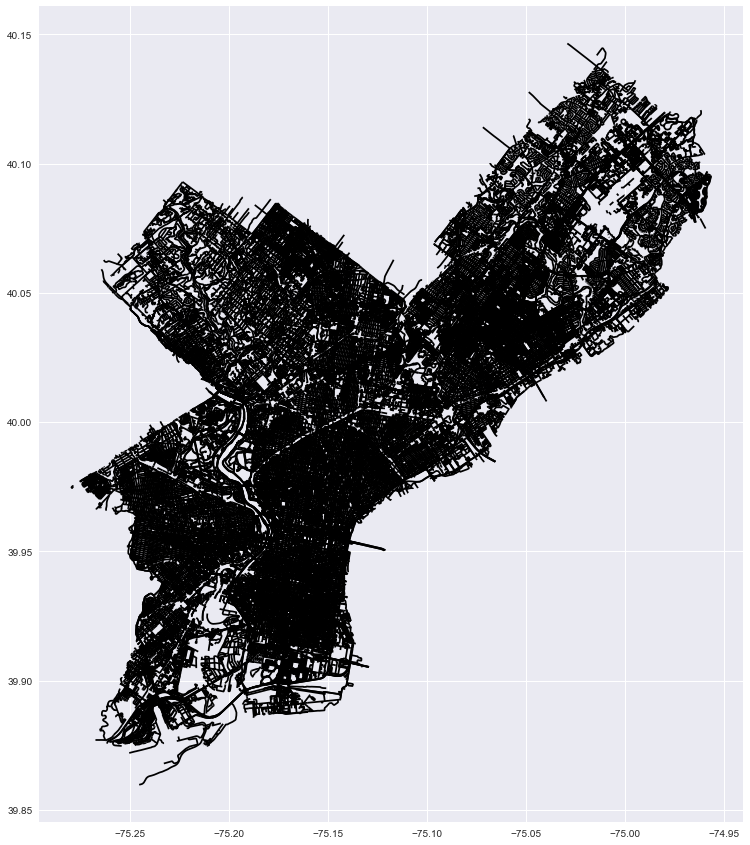

In [30]:
fig, ax = plt.subplots(figsize =(15,15))
roads.plot(ax = ax, edgecolor='black')# plotting all roads

In [21]:
roads.fclass.value_counts()# this shows the type of roads. Most of the roads are  ones thata are used for service, foorway and residential

service           26354
footway           19962
residential       13744
primary            3392
tertiary           2338
secondary          2009
path               1132
trunk               688
motorway_link       649
motorway            625
steps               569
cycleway            351
trunk_link          190
pedestrian          190
unclassified        153
primary_link        150
track               123
secondary_link       87
tertiary_link        62
bridleway            41
track_grade2          5
living_street         5
unknown               4
track_grade5          2
track_grade1          2
Name: fclass, dtype: int64

In [31]:
car_roads = roads[(roads.fclass == 'tertiary') |
                  (roads.fclass == 'tertiary_link') |
                  (roads.fclass == 'secondary') |
                  (roads.fclass == 'secondary_link') |
                  (roads.fclass == 'primary') |
                  (roads.fclass == 'primary_link') |
                  (roads.fclass == 'motorway') |
                  (roads.fclass == 'motorway_linkt')]
                  
car_roads.shape

(8663, 17)

Text(0.5, 1.0, 'Car Roads')

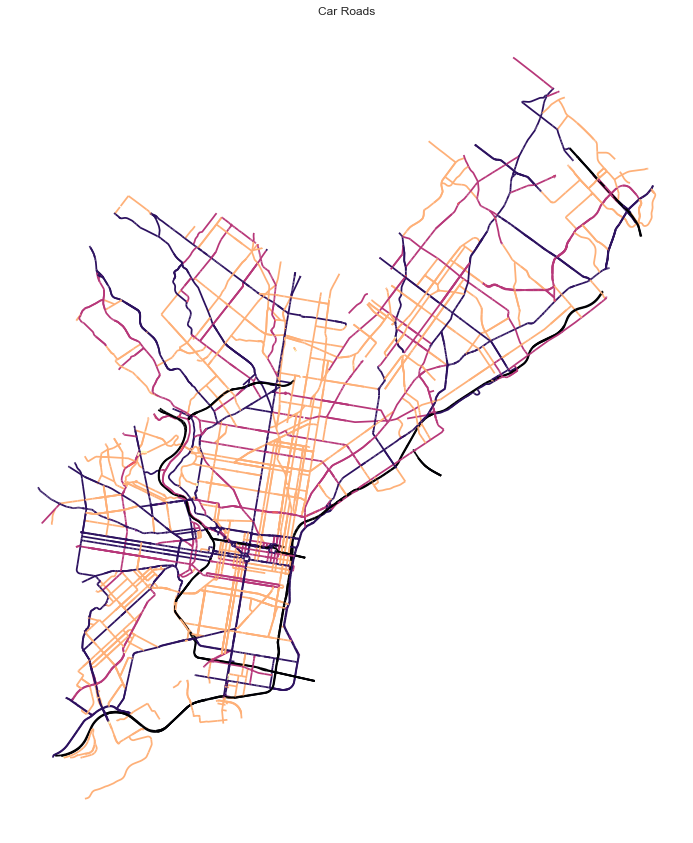

In [36]:
fig, ax = plt.subplots(figsize =(15,15))
car_roads.plot(ax = ax, markersize=0.01, column='fclass',figsize=(5, 5), cmap = 'magma')
plt.axis('off');
plt.title("Car Roads")

Text(0.5, 1.0, 'Main Roads - Philadelphia')

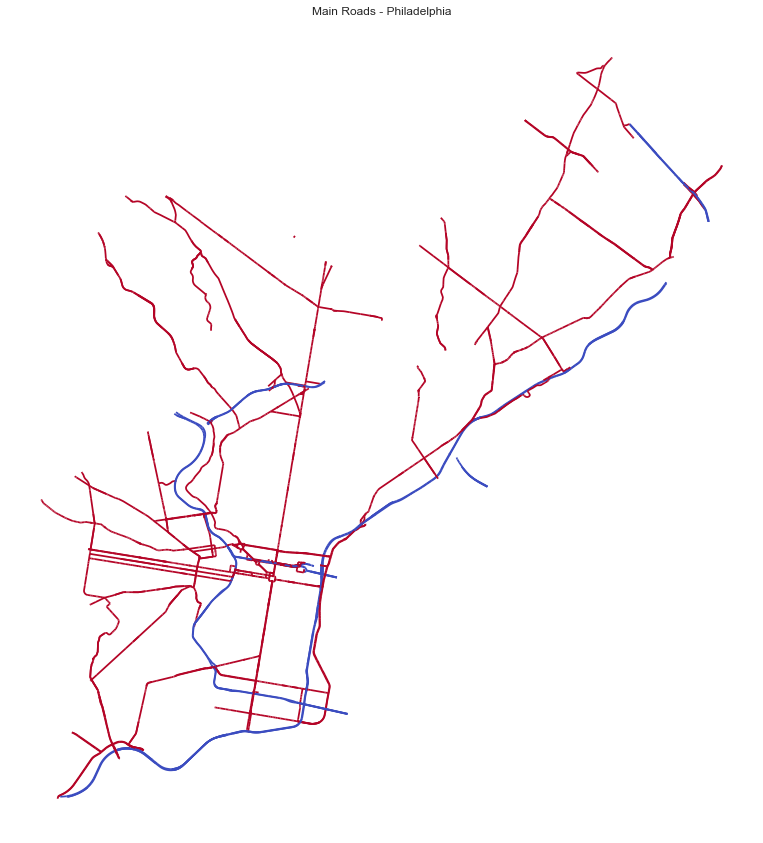

In [40]:
main_roads = car_roads[(car_roads.fclass == 'primary') |
                       (car_roads.fclass == 'motorway')
                      ]

fig, ax = plt.subplots(figsize =(15,15))
main_roads.plot(ax = ax, column='fclass', cmap = 'coolwarm')
plt.axis('off')
plt.title("Main Roads - Philadelphia")

### Open Street Map File on predicted Vacant lot file

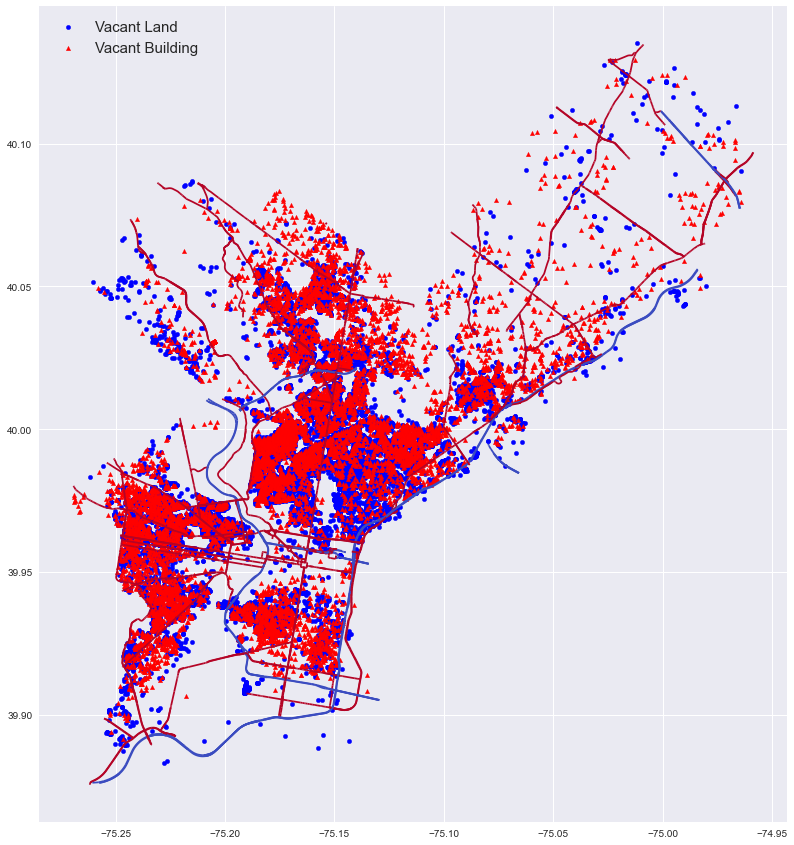

In [41]:
#vacant land and vant building layer on top of main roads in philadelphia
fig, ax = plt.subplots(figsize =(15,15))
main_roads.plot(ax = ax, column='fclass', cmap = 'coolwarm')
geo_df[geo_df['VACANT_FLAG'] == 'Land'].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Vacant Land")
geo_df[geo_df['VACANT_FLAG'] == 'Building'].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "Vacant Building")
#geo_df.plot(column = 'BUILD_RANK', ax = ax, alpha = 0.5, legend = True, markersize = 10)
plt.legend(prop = {'size' : 15})

### Loading Census Data

In [136]:
#details on census and American comunity Survey data https://data.census.gov/cedsci/table
#censusdata.search('acs5', 2015,'concept', 'vacant')# finding 5 year ACS estimates from 2015 with transportation in the concept
#selected data tables from here https://censusreporter.org/profiles/15000US421010176021-block-group-1-philadelphia-pa/
#https://learn.arcgis.com/en/related-concepts/united-states-census-geography.htm
#states > counties > tracts > blockgroups > blocks 
#tracts are  fairly homogenous, when tract is beyond 800 people the tract is split up
#blockgroup contains blocks. Block groups have between 250 and 550 housing units
#census block is the smalest geographic census unit
#Blocks can be bounded by visible features—such as streets—or by invisible boundaries, such as city limits. 
# Census blocks are often the same as ordinary city blocks. Census blocks change every decade.
#print(data.head)
censusdata.search('acs5', 2019,'label', 'age')

[('B01002A_001E',
  'MEDIAN AGE BY SEX (WHITE ALONE)',
  'Estimate!!Median age --!!Total:'),
 ('B01002A_002E',
  'MEDIAN AGE BY SEX (WHITE ALONE)',
  'Estimate!!Median age --!!Male'),
 ('B01002A_003E',
  'MEDIAN AGE BY SEX (WHITE ALONE)',
  'Estimate!!Median age --!!Female'),
 ('B01002B_001E',
  'MEDIAN AGE BY SEX (BLACK OR AFRICAN AMERICAN ALONE)',
  'Estimate!!Median age --!!Total:'),
 ('B01002B_002E',
  'MEDIAN AGE BY SEX (BLACK OR AFRICAN AMERICAN ALONE)',
  'Estimate!!Median age --!!Male'),
 ('B01002B_003E',
  'MEDIAN AGE BY SEX (BLACK OR AFRICAN AMERICAN ALONE)',
  'Estimate!!Median age --!!Female'),
 ('B01002C_001E',
  'MEDIAN AGE BY SEX (AMERICAN INDIAN AND ALASKA NATIVE ALONE)',
  'Estimate!!Median age --!!Total:'),
 ('B01002C_002E',
  'MEDIAN AGE BY SEX (AMERICAN INDIAN AND ALASKA NATIVE ALONE)',
  'Estimate!!Median age --!!Male'),
 ('B01002C_003E',
  'MEDIAN AGE BY SEX (AMERICAN INDIAN AND ALASKA NATIVE ALONE)',
  'Estimate!!Median age --!!Female'),
 ('B01002D_001E',
  'MEDI

In [17]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B25002'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B25002_001E  | OCCUPANCY STATUS               | !! Estimate Total                                        | int  
B25002_002E  | OCCUPANCY STATUS               | !! !! Estimate Total Occupied                            | int  
B25002_003E  | OCCUPANCY STATUS               | !! !! Estimate Total Vacant                              | int  
-------------------------------------------------------------------------------------------------------------------


In [134]:
acs_occupancy = censusdata.download('acs5', 2019,
           censusdata.censusgeo([('state', '42'),
                                 ('county', '101'), # philadelphia county
                                 ('block group', '*')]),
                                 ['B25002_001E', 'B25002_002E','B25002_003E'])

acs_occupancy.rename(columns = {'B25002_001E': 'total',
                                'B25002_002E': 'occupied',
                                'B25002_003E' : 'vacant'}, inplace = True)

acs_occupancy.to_csv('data/acs/occupancy.csv')
acs_occupancy.head()

,total,occupied,vacant
"Block Group 1, Census Tract 9807, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:980700> block group:1",0,0,0
"Block Group 3, Census Tract 27.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:002701> block group:3",707,616,91
"Block Group 2, Census Tract 337.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:033701> block group:2",400,400,0
"Block Group 3, Census Tract 337.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:033701> block group:3",1451,1340,111
"Block Group 2, Census Tract 205, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:020500> block group:2",774,668,106


In [98]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B25004'))# type of vacant

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B25004_001E  | VACANCY STATUS                 | !! Estimate Total:                                       | int  
B25004_002E  | VACANCY STATUS                 | !! !! Estimate Total: For rent                           | int  
B25004_003E  | VACANCY STATUS                 | !! !! Estimate Total: Rented, not occupied               | int  
B25004_004E  | VACANCY STATUS                 | !! !! Estimate Total: For sale only                      | int  
B25004_005E  | VACANCY STATUS                 | !! !! Estimate Total: Sold, not occupied                 | int  
B25004_006E  | VACANCY STATUS                 | !! !! Estimate Total: For seasonal, recreational, or occ | int  
B25004_007E  | VACANCY STATUS                 | !! !! Estimate Total: For migrant workers    

In [135]:
acs_vacant_type = censusdata.download('acs5', 2019,
           censusdata.censusgeo([('state', '42'),
                                 ('county', '101'), # philadelphia county
                                 ('block group', '*')]),
                                 ['B25004_001E', 'B25004_002E', 'B25004_003E', 'B25004_004E', 'B25004_005E', 'B25004_006E',
                                 'B25004_007E', 'B25004_008E'])

acs_vacant_type.rename(columns = {'B25004_001E': 'total',
                                'B25004_002E':  'for_rent',
                                'B25004_003E' : 'rented_not_occupied',
                                'B25004_004E' : 'for_sale_only',
                                'B25004_005E' : 'sold_not_occupied',
                                'B25004_006E' : 'seasonal_recreational',
                                'B25004_007E' : 'migrant_workers',
                                'B25004_008E' : 'other',}, inplace = True)

acs_vacant_type.to_csv('data/acs/vacant_type.csv')
acs_vacant_type.head()

,total,for_rent,rented_not_occupied,for_sale_only,sold_not_occupied,seasonal_recreational,migrant_workers,other
"Block Group 1, Census Tract 9807, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:980700> block group:1",0,0,0,0,0,0,0,0
"Block Group 3, Census Tract 27.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:002701> block group:3",91,0,0,48,0,0,0,43
"Block Group 2, Census Tract 337.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:033701> block group:2",0,0,0,0,0,0,0,0
"Block Group 3, Census Tract 337.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:033701> block group:3",111,73,0,0,38,0,0,0
"Block Group 2, Census Tract 205, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:020500> block group:2",106,0,0,0,0,0,0,106


In [143]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B01001'))#age and sex

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01001_001E  | SEX BY AGE                     | !! Estimate Total:                                       | int  
B01001_002E  | SEX BY AGE                     | !! !! Estimate Total: Male:                              | int  
B01001_003E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: Under 5 years             | int  
B01001_004E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 5 to 9 years              | int  
B01001_005E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 10 to 14 years            | int  
B01001_006E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 15 to 17 years            | int  
B01001_007E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 18 and 19 year

In [144]:
acs_gender = censusdata.download('acs5', 2019,
           censusdata.censusgeo([('state', '42'),
                                 ('county', '101'), # philadelphia county
                                 ('block group', '*')]),
                                 ['B01001_001E', 'B01001_002E', 'B01001_026E'])

acs_gender.rename(columns = {'B01001_001E': 'total',
                             'B01001_002E': 'Male',
                             'B01001_026E': 'Female',}, inplace = True) #include age here, group by under 18, 18-64, 65 and over

acs_gender.to_csv('data/acs/gender.csv')
acs_gender.head()

,total,Male,Female
"Block Group 1, Census Tract 9807, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:980700> block group:1",0,0,0
"Block Group 3, Census Tract 27.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:002701> block group:3",1955,1023,932
"Block Group 2, Census Tract 337.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:033701> block group:2",976,541,435
"Block Group 3, Census Tract 337.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:033701> block group:3",3859,1969,1890
"Block Group 2, Census Tract 205, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:020500> block group:2",1017,553,464


In [75]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B03002'))#race

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B03002_001E  | HISPANIC OR LATINO ORIGIN BY R | !! Estimate Total                                        | int  
B03002_002E  | HISPANIC OR LATINO ORIGIN BY R | !! !! Estimate Total Not Hispanic or Latino              | int  
B03002_003E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total Not Hispanic or Latino White alo | int  
B03002_004E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total Not Hispanic or Latino Black or  | int  
B03002_005E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total Not Hispanic or Latino American  | int  
B03002_006E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total Not Hispanic or Latino Asian alo | int  
B03002_007E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total Not Hispanic or Latin

In [145]:
censusdata.censustable('acs5', 2019, 'B03002')

OrderedDict([('B03002_001E',
              {'label': 'Estimate!!Total:',
               'concept': 'HISPANIC OR LATINO ORIGIN BY RACE',
               'predicateType': 'int'}),
             ('B03002_002E',
              {'label': 'Estimate!!Total:!!Not Hispanic or Latino:',
               'concept': 'HISPANIC OR LATINO ORIGIN BY RACE',
               'predicateType': 'int'}),
             ('B03002_003E',
              {'label': 'Estimate!!Total:!!Not Hispanic or Latino:!!White alone',
               'concept': 'HISPANIC OR LATINO ORIGIN BY RACE',
               'predicateType': 'int'}),
             ('B03002_004E',
              {'label': 'Estimate!!Total:!!Not Hispanic or Latino:!!Black or African American alone',
               'concept': 'HISPANIC OR LATINO ORIGIN BY RACE',
               'predicateType': 'int'}),
             ('B03002_005E',
              {'label': 'Estimate!!Total:!!Not Hispanic or Latino:!!American Indian and Alaska Native alone',
               'concept': 'HISPA

In [76]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B17001'))#poverty stattus

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B17001_001E  | POVERTY STATUS IN THE PAST 12  | !! Estimate Total                                        | int  
B17001_002E  | POVERTY STATUS IN THE PAST 12  | !! !! Estimate Total Income in the past 12 months below  | int  
B17001_003E  | POVERTY STATUS IN THE PAST 12  | !! !! !! Estimate Total Income in the past 12 months bel | int  
B17001_004E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past 12 months  | int  
B17001_005E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past 12 months  | int  
B17001_006E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past 12 months  | int  
B17001_007E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past

In [77]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B19001'))#household income

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19001_001E  | HOUSEHOLD INCOME IN THE PAST 1 | !! Estimate Total                                        | int  
B19001_002E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total Less than $10,000                   | int  
B19001_003E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $10,000 to $14,999                  | int  
B19001_004E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $15,000 to $19,999                  | int  
B19001_005E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $20,000 to $24,999                  | int  
B19001_006E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $25,000 to $29,999                  | int  
B19001_007E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $30,000 to $34,999      

In [78]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B15002'))#education

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B15002_001E  | SEX BY EDUCATIONAL ATTAINMENT  | !! Estimate Total                                        | int  
B15002_002E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! Estimate Total Male                                | int  
B15002_003E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male No schooling completed      | int  
B15002_004E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male Nursery to 4th grade        | int  
B15002_005E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male 5th and 6th grade           | int  
B15002_006E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male 7th and 8th grade           | int  
B15002_007E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male 9th grade       

In [59]:
states = censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2015)#printing name of state and code in the dataset
print(states['Pennsylvania']) # pennsylvania is code 42

Summary level: 040, state:42


In [23]:
counties = censusdata.geographies(censusdata.censusgeo([('state', '42'), ('county', '*')]), 'acs5', 2015)
counties # finidng all counties in PA

{'Somerset County, Pennsylvania': censusgeo((('state', '42'), ('county', '111'))),
 'Delaware County, Pennsylvania': censusgeo((('state', '42'), ('county', '045'))),
 'Cameron County, Pennsylvania': censusgeo((('state', '42'), ('county', '023'))),
 'Bucks County, Pennsylvania': censusgeo((('state', '42'), ('county', '017'))),
 'Lehigh County, Pennsylvania': censusgeo((('state', '42'), ('county', '077'))),
 'Clarion County, Pennsylvania': censusgeo((('state', '42'), ('county', '031'))),
 'Greene County, Pennsylvania': censusgeo((('state', '42'), ('county', '059'))),
 'Luzerne County, Pennsylvania': censusgeo((('state', '42'), ('county', '079'))),
 'Columbia County, Pennsylvania': censusgeo((('state', '42'), ('county', '037'))),
 'Jefferson County, Pennsylvania': censusgeo((('state', '42'), ('county', '065'))),
 'Perry County, Pennsylvania': censusgeo((('state', '42'), ('county', '099'))),
 'Sullivan County, Pennsylvania': censusgeo((('state', '42'), ('county', '113'))),
 'Dauphin County

In [35]:
censusdata.geographies(censusdata.censusgeo([('state', '42'),('county', '101')]), 'acs5', 2015)# selecting philadelphia county only

{'Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101')))}

In [81]:
censusdata.geographies(censusdata.censusgeo([('state', '42'),('county', '101'), ('block group', '*')]), 'acs5', 2019)# all block group in philadelphia county


{'Block Group 1, Census Tract 9807, Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101'), ('tract', '980700'), ('block group', '1'))),
 'Block Group 3, Census Tract 27.01, Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101'), ('tract', '002701'), ('block group', '3'))),
 'Block Group 2, Census Tract 337.01, Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101'), ('tract', '033701'), ('block group', '2'))),
 'Block Group 3, Census Tract 337.01, Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101'), ('tract', '033701'), ('block group', '3'))),
 'Block Group 2, Census Tract 205, Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101'), ('tract', '020500'), ('block group', '2'))),
 'Block Group 1, Census Tract 218, Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101'), ('tract', '021800'), ('block group', '1'))),
 'Block Group

### Philly crime data

In [208]:
crime = pd.read_csv('data/city/crime.csv')

In [209]:
crime.columns

Index(['the_geom', 'the_geom_webmercator', 'objectid', 'dc_dist', 'psa',
       'dispatch_date_time', 'dispatch_date', 'dispatch_time', 'hour_',
       'dc_key', 'location_block', 'ucr_general', 'text_general_code',
       'point_x', 'point_y', 'lat', 'lng'],
      dtype='object')

In [210]:
crime.head()

,the_geom,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,107,6,1,2013-05-28 09:43:00,2013-05-28,09:43:00,9.0,201306025636,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441
1,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,108,6,1,2013-11-26 10:24:00,2013-11-26,10:24:00,10.0,201306061456,N 02ND ST / SPRING GARDEN ST,300,Robbery No Firearm,-75.141441,39.960712,39.960712,-75.141441
2,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,109,6,1,2013-12-16 13:10:00,2013-12-16,13:10:00,13.0,201306064336,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441
3,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,110,6,1,2014-01-27 13:12:00,2014-01-27,13:12:00,13.0,201406003790,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441
4,0101000020E6100000FB79CF5866C552C0942E81847604...,0101000020110F0000A78BF98174E25FC145F74595D894...,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11.0,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372


In [211]:
crime.isna().sum()

the_geom                 282
the_geom_webmercator     282
objectid                   0
dc_dist                    0
psa                      644
dispatch_date_time         0
dispatch_date              0
dispatch_time              0
hour_                     28
dc_key                     0
location_block            55
ucr_general                0
text_general_code          0
point_x                 1423
point_y                 1423
lat                      282
lng                      282
dtype: int64

In [212]:
crime.dtypes

the_geom                 object
the_geom_webmercator     object
objectid                  int64
dc_dist                   int64
psa                      object
dispatch_date_time       object
dispatch_date            object
dispatch_time            object
hour_                   float64
dc_key                    int64
location_block           object
ucr_general               int64
text_general_code        object
point_x                 float64
point_y                 float64
lat                     float64
lng                     float64
dtype: object

In [213]:
#dropping null values of lat  and lng values
crime.dropna(subset=['lat'], inplace=True)
crime.dropna(subset=['lng'], inplace=True)

In [214]:
#dropping null values of  point_x and point_y values
crime.dropna(subset=['point_x'], inplace=True)
crime.dropna(subset=['point_y'], inplace=True)

In [215]:
crime['dispatch_date'] = pd.to_datetime(crime['dispatch_date'])

In [233]:
crime = crime.loc[crime["dispatch_date"] >= "2014-01-01"].reset_index(drop=True)
crime.shape

(1258747, 18)

In [234]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258747 entries, 0 to 1258746
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   the_geom              1258747 non-null  object        
 1   the_geom_webmercator  1258747 non-null  object        
 2   objectid              1258747 non-null  int64         
 3   dc_dist               1258747 non-null  int64         
 4   psa                   1258577 non-null  object        
 5   dispatch_date_time    1258747 non-null  object        
 6   dispatch_date         1258747 non-null  datetime64[ns]
 7   dispatch_time         1258747 non-null  object        
 8   hour_                 1258742 non-null  float64       
 9   dc_key                1258747 non-null  int64         
 10  location_block        1258740 non-null  object        
 11  ucr_general           1258747 non-null  int64         
 12  text_general_code     1258747 non-null  ob

In [250]:
print(crime['point_x'].min())
print(crime['lng'].min())

-81.58137853
-81.58137853


In [251]:
print(crime['point_x'].max())
print(crime['lng'].max())

2725830.9416288
-74.95753244


In [252]:
print(crime['point_y'].max())
print(crime['lat'].max())

278069.04403542
40.13771285


In [253]:
print(crime['point_y'].min())
print(crime['lat'].min())

-3975202.88585439
28.41954829


<AxesSubplot:>

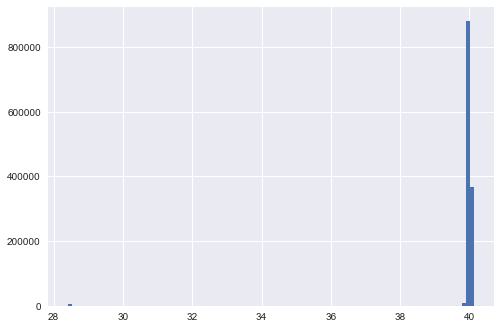

In [278]:
crime['lat'].hist(bins = 100) # histogram shows the irregularies in lat data

In [282]:
print(crime.loc[crime['lat']>30].shape)
print(crime.loc[crime['lat']<30].shape)

(1253757, 18)
(4990, 18)


<AxesSubplot:>

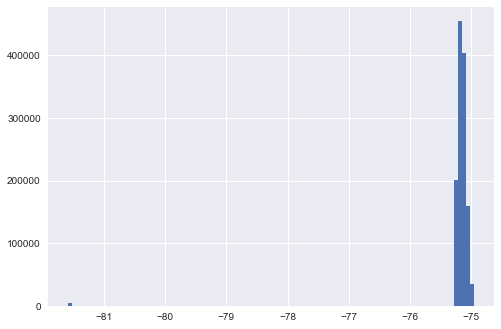

In [277]:
crime['lng'].hist(bins= 100)# historgram shows the irregularities in lng data

In [283]:
print(crime.loc[crime['lng']<-81].shape)
print(crime.loc[crime['lng']>-81].shape)

(4990, 18)
(1253757, 18)


In [285]:
crime = crime.loc[crime['lng']>-81].reset_index(drop=True)
crime.shape

(1253757, 18)

<AxesSubplot:>

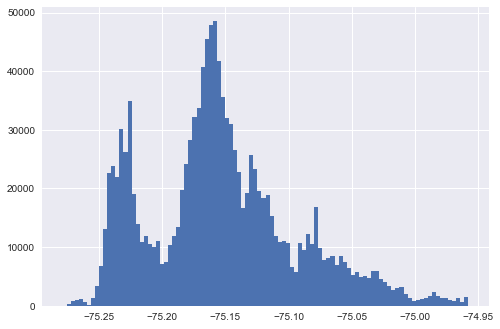

In [289]:
crime['lng'].hist(bins= 100)

<AxesSubplot:>

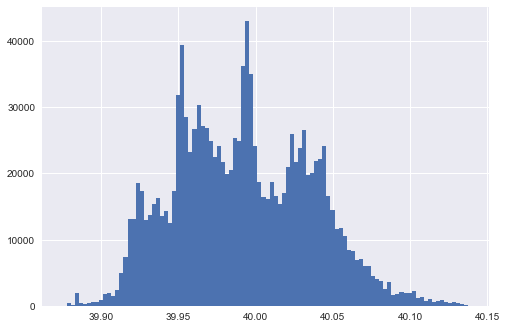

In [290]:
crime['lat'].hist(bins= 100)

In [291]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(crime["lng"], crime["lat"])]
geometry[:3]

In [292]:
crime_df = gpd.GeoDataFrame(crime,
                            crs = crs,
                            geometry = geometry)

crime_df.head()

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,the_geom,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,geometry
0,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,110,6,1,2014-01-27 13:12:00,2014-01-27,13:12:00,13.0,201406003790,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441,POINT (-75.14144 39.96071)
1,0101000020E61000002FD31F2F1ECE52C07129BE0C0CF5...,0101000020110F0000401FFA8143F15FC1160AD2D2C283...,117,12,1,2018-01-06 10:56:00,2018-01-06,10:56:00,10.0,201812001185,6600 BLOCK ESSINGTON AVE,600,Thefts,-75.220592,39.914430,39.914430,-75.220592,POINT (-75.22059 39.91443)
2,0101000020E61000002FD31F2F1ECE52C07129BE0C0CF5...,0101000020110F0000401FFA8143F15FC1160AD2D2C283...,118,12,1,2018-06-21 22:57:00,2018-06-21,22:57:00,22.0,201812045738,6600 BLOCK ESSINGTON AVE,300,Robbery Firearm,-75.220592,39.914430,39.914430,-75.220592,POINT (-75.22059 39.91443)
3,0101000020E61000002FD31F2F1ECE52C07129BE0C0CF5...,0101000020110F0000401FFA8143F15FC1160AD2D2C283...,119,12,1,2018-07-23 01:58:00,2018-07-23,01:58:00,1.0,201812053606,6600 BLOCK ESSINGTON AVE,300,Robbery No Firearm,-75.220592,39.914430,39.914430,-75.220592,POINT (-75.22059 39.91443)
4,0101000020E61000002FD31F2F1ECE52C07129BE0C0CF5...,0101000020110F0000401FFA8143F15FC1160AD2D2C283...,120,12,1,2015-01-15 08:58:00,2015-01-15,08:58:00,8.0,201512003444,6600 BLOCK ESSINGTON AVE,500,Burglary Non-Residential,-75.220592,39.914430,39.914430,-75.220592,POINT (-75.22059 39.91443)


In [293]:
#crime_df = crime_df.to_crs(epsg = 4326)

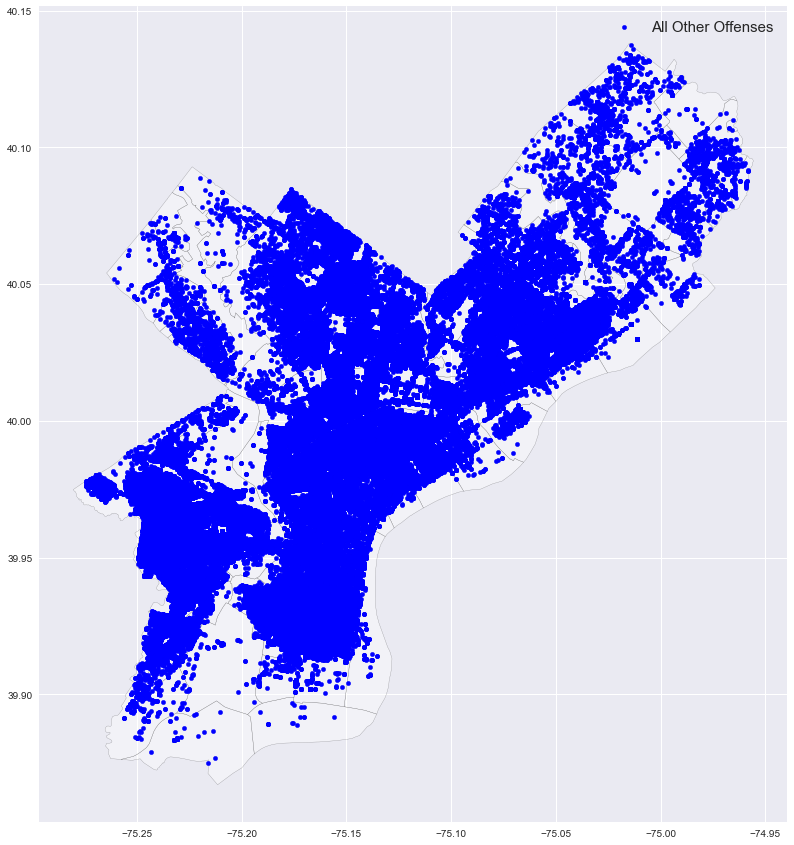

In [295]:
fig, ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')
crime_df[crime_df['text_general_code'] == 'All Other Offenses'].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "All Other Offenses")
#crime_df[crime_df['text_general_code'] == 'Thefts'].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "Thefts")
#geo_df.plot(column = 'BUILD_RANK', ax = ax, alpha = 0.5, legend = True, markersize = 10)
plt.legend(prop = {'size' : 15})
plt.show()

In [ ]:
crime_df[crime_df['text_general_code'] == 'All Other Offenses']

In [169]:
crime_df['text_general_code'].value_counts()

All Other Offenses                         540997
Other Assaults                             386391
Thefts                                     363316
Vandalism/Criminal Mischief                268485
Theft from Vehicle                         231893
Narcotic / Drug Law Violations             173414
Fraud                                      162028
Burglary Residential                       115355
Aggravated Assault No Firearm               93834
Motor Vehicle Theft                         65129
Robbery No Firearm                          65092
DRIVING UNDER THE INFLUENCE                 62832
Robbery Firearm                             50337
Disorderly Conduct                          42401
Aggravated Assault Firearm                  41938
Weapon Violations                           32570
Burglary Non-Residential                    31769
Other Sex Offenses (Not Commercialized)     19345
Rape                                        16367
Prostitution and Commercialized Vice        15397


In [171]:
crime_df.isna().sum()

the_geom                 282
the_geom_webmercator     282
objectid                   0
dc_dist                    0
psa                      644
dispatch_date_time         0
dispatch_date              0
dispatch_time              0
hour_                     28
dc_key                     0
location_block            55
ucr_general                0
text_general_code          0
point_x                 1423
point_y                 1423
lat                      282
lng                      282
geometry                   0
dtype: int64

<AxesSubplot:>

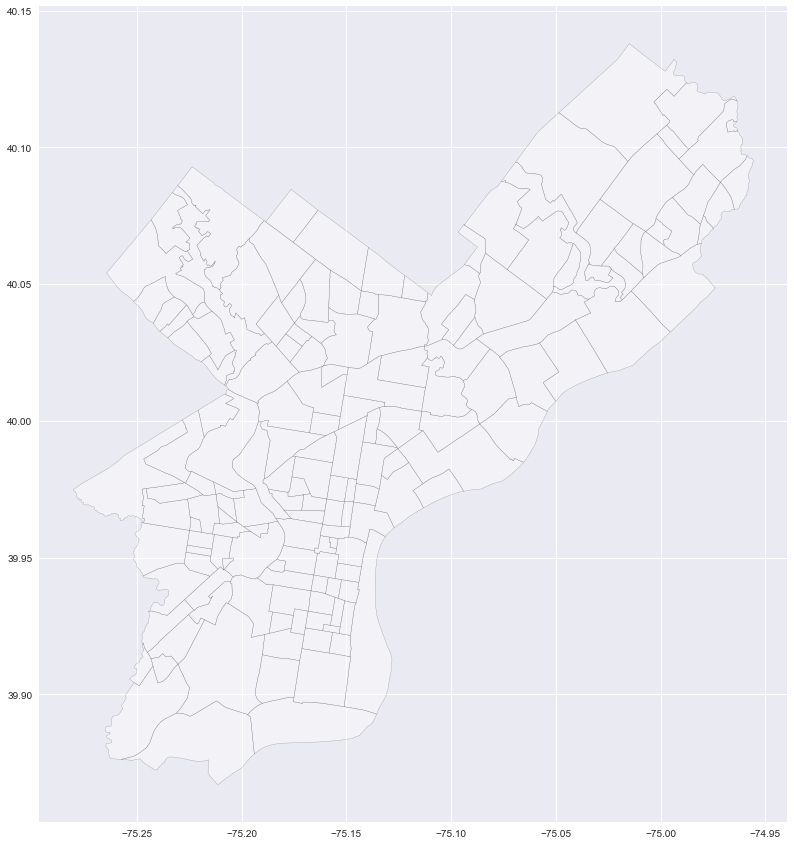

In [225]:
street_map = gpd.read_file("data/geo_shape/Neighborhoods_Philadelphia.shp")
fig, ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')


In [255]:
street_map.to_crs(epsg = 4326).head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((-75.06773 40.00540, -75.06765 40.005..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((-75.01560 40.09487, -75.01768 40.092..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((-75.18848 40.07273, -75.18846 40.072..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((-75.21221 40.08604, -75.21210 40.086..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((-75.18478 40.02837, -75.18426 40.027..."
